In [ ]:
#                                                   باسمه تعالی

In [ ]:
#                      طاها معماری 400101989 - سید علیرضا موسوی 400102085 - پروژه ی آمار و احتمال     

# شبیه سازی 5

Company1 :
β0 = 3.0195452805441025  ---->
β1 = 0.10241457418458706  ---->
y = 3.02 + 0.102x


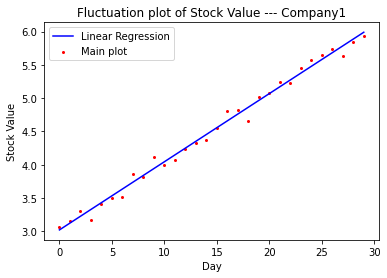

Company2 :
β0 = 2.8511800131711977  ---->
β1 = 0.31698482043161647  ---->
y = 2.851 + 0.317x


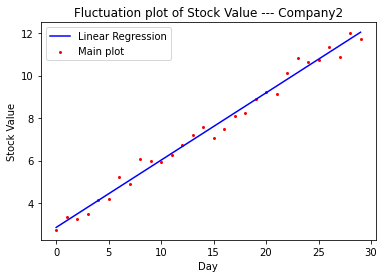

Company3 :
β0 = 3.0742853767088834  ---->
β1 = 0.5095406765807879  ---->
y = 3.074 + 0.51x


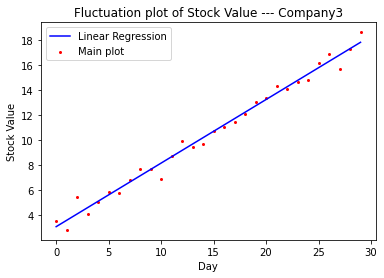

Company4 :
β0 = 2.7826912745549865  ---->
β1 = 0.7193582859238877  ---->
y = 2.783 + 0.719x


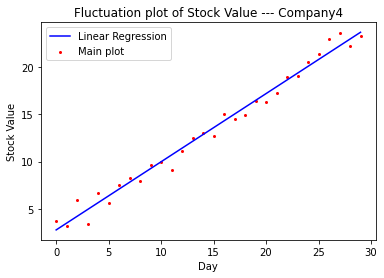

Company5 :
β0 = 2.8428764079413735  ---->
β1 = 0.9374915774304288  ---->
y = 2.843 + 0.937x


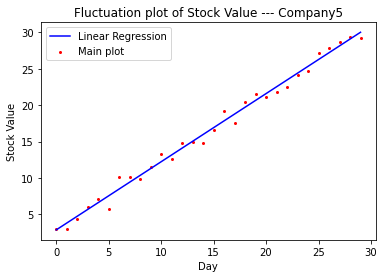

Company6 :
β0 = 3.4196890116416476  ---->
β1 = 1.1318326183131526  ---->
y = 3.42 + 1.132x


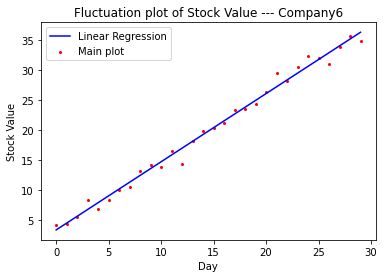

beta_log array :
[[3.01954528 0.10241457]
 [2.85118001 0.31698482]
 [3.07428538 0.50954068]
 [2.78269127 0.71935829]
 [2.84287641 0.93749158]
 [3.41968901 1.13183262]]


In [395]:
import numpy as np
import pandas as pd



# Linear Regression Coefficients Finder

def LRCF(PandasDataFrame,MemoryMatrix):                    
    for i in range(0,6):

        index = np.arange(0,30)
        CompanyData = np.array(PandasDataFrame[i])

        index_mean = np.mean(index)
        CompanyData_mean = np.mean(CompanyData)


        CompanyData = CompanyData - CompanyData_mean
        index = index - index_mean

        squaredX = index**2
        XY = index * CompanyData

        beta_1 = np.sum(XY) / np.sum(squaredX)
        beta_0 = CompanyData_mean - beta_1*index_mean
        
        MemoryMatrix[i,0] = beta_0
        MemoryMatrix[i,1] = beta_1
        
        print(f'Company{i+1} :')
        print(f"β0 = {beta_0}  ---->")
        print(f"β1 = {beta_1}  ---->")
        print(f"y = {round(beta_0,3)} + {round(beta_1,3)}x")
        
        y_linear = []
        for x in range (0,30):
            y_linear.append(beta_0 + beta_1*x)
            
        plt.scatter(np.arange(0,30),PandasDataFrame[i],s=4,color='r')
        plt.plot(y_linear,color='b')
        plt.ylabel("Stock Value")
        plt.xlabel("Day")
        plt.title(f"Fluctuation plot of Stock Value --- Company{i+1}")
        plt.legend(["Linear Regression","Main plot"])
        plt.show()
        


        
#change it to whatever path the data file exists
dataFile = pd.read_csv("I:\\SUT\\Term4\\amar\\PROJECT\\Data.csv", usecols=[0,1,2,3,4,5,6], header=None)

shape = (6, 2)
beta_log = np.empty(shape)

LRCF(dataFile,beta_log)


print('beta_log array :')
print(beta_log)


# شبیه سازی 6

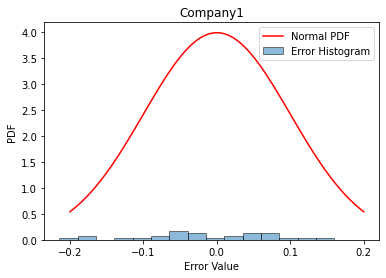

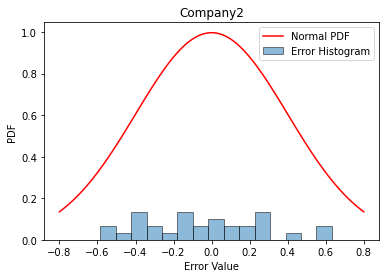

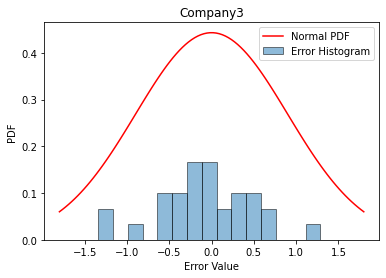

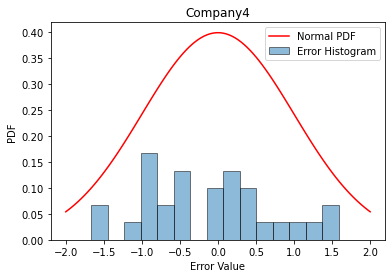

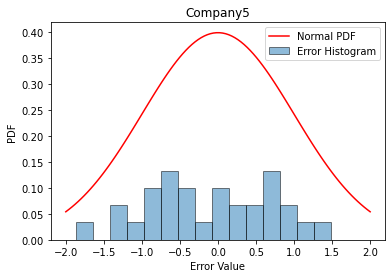

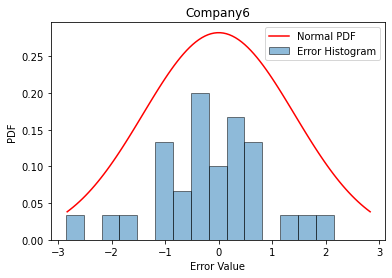

In [396]:
import math

def ErrorCalculator(PandasDataFrame,beta_log,Vars): 
    
    for i in range(0,6):
        CompanyData = np.array(PandasDataFrame[i])
        
        beta_0 = beta_log[i,0]
        beta_1 = beta_log[i,1]
        
        ErrorLog = []

        for x in range (0,30):
            ErrorLog.append(CompanyData[x] - (beta_0 + beta_1*x))
            
            
        hist,bins = np.histogram(ErrorLog,bins=15)
        pdf = hist/30
        plt.bar(bins[:-1],pdf,width = np.diff(bins),edgecolor='k',alpha=0.5)
        
        
        mean = 0
        std = math.sqrt(suitable_vars[i])
        
        x = np.linspace(mean - 2*std, mean + 2*std, 100)
        plt.plot(x, norm.pdf(x, mean, std),color='r')
        plt.ylabel("PDF")
        plt.xlabel("Error Value")
        plt.title(f"Company{i+1}")
        plt.legend(["Normal PDF","Error Histogram"])
        plt.show()



suitable_vars = [0.01 , 0.16 , 0.81 , 1 , 1 , 2]        
ErrorCalculator(dataFile,beta_log,suitable_vars)

# شبیه سازی 7

In [397]:
import nashpy as nash

Arta = np.array([[0.183 , 0.139 , 0.139 , 0.139 , 0.139 , 0.139],
                 [0.420 , 0.591 , 0.420 , 0.420 , 0.420 , 0.420],
                 [0.697 , 0.697 , 0.995 , 0.697 , 0.697 , 0.697],
                 [0.985 , 0.985 , 0.985 , 1.495 , 0.985 , 0.985],
                 [1.284 , 1.284 , 1.284 , 1.284 , 2.134 , 1.284],
                 [1.550 , 1.550 , 1.550 , 1.550 , 1.550 , 3.060]])

Sorena = np.array([[0.183 , 0.474 , 0.807 , 1.228 , 1.787 , 2.640],
                   [0.145 , 0.591 , 0.807 , 1.228 , 1.787 , 2.640],
                   [0.145 , 0.474 , 0.995 , 1.228 , 1.787 , 2.640],
                   [0.145 , 0.474 , 0.807 , 1.495 , 1.787 , 2.640],
                   [0.145 , 0.474 , 0.807 , 1.228 , 2.134 , 2.640],
                   [0.145 , 0.474 , 0.807 , 1.228 , 1.787 , 3.060]])


game = nash.Game(Arta, Sorena)
eq = game.vertex_enumeration()
print(list(eq))


[(array([ 0.00000000e+00, -2.12330153e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00]), array([0., 0., 0., 0., 0., 1.]))]


# شبیه سازی 8

In [398]:
np.random.seed(400101989)
A = np.zeros((6,6))
B = np.zeros((6,6))


for i in range (6):
    sample = np.random.normal(0, math.sqrt(suitable_vars[i]), 1)
    A[i,:] = sample
    B[:,i] = sample

print(A)
print()
print(B)
print()

    
game2 = nash.Game(A, B)
eq2 = game2.vertex_enumeration()
print(list(eq2))

[[-0.15747374 -0.15747374 -0.15747374 -0.15747374 -0.15747374 -0.15747374]
 [ 0.54533115  0.54533115  0.54533115  0.54533115  0.54533115  0.54533115]
 [-0.39357292 -0.39357292 -0.39357292 -0.39357292 -0.39357292 -0.39357292]
 [-0.63468715 -0.63468715 -0.63468715 -0.63468715 -0.63468715 -0.63468715]
 [ 0.32205047  0.32205047  0.32205047  0.32205047  0.32205047  0.32205047]
 [-1.50979225 -1.50979225 -1.50979225 -1.50979225 -1.50979225 -1.50979225]]

[[-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]
 [-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]
 [-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]
 [-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]
 [-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]
 [-0.15747374  0.54533115 -0.39357292 -0.63468715  0.32205047 -1.50979225]]

[(array([ 1.42602833e-17,  1.00000000e+00, -1.42602833e-17, -1.42602833e-17,
        0.00000000e